# Example: Displaying Detected Peaks

The |Display| module also allows for detected peaks to marked on a TIC plot.

First, setup the paths to the datafiles and the output directory, then import JCAMP_reader and build_intensity_matrix.

In [1]:
import pathlib
data_directory = pathlib.Path(".").resolve().parent.parent / "pyms-data"
# Change this if the data files are stored in a different location

output_directory = pathlib.Path(".").resolve() / "output"

from pyms.GCMS.IO.JCAMP import JCAMP_reader
from pyms.IntensityMatrix import build_intensity_matrix

Read the raw data files, extract the TIC and build the |IntensityMatrix| .

In [2]:
jcamp_file = data_directory / "gc01_0812_066.jdx"
data = JCAMP_reader(jcamp_file)
data.trim("500s", "2000s")
tic = data.tic
im = build_intensity_matrix(data)

 -> Reading JCAMP file '/home/vagrant/PyMassSpec/pyms-data/gc01_0812_066.jdx'
Trimming data to between 520 and 4517 scans


Perform pre-filtering and peak detection.
For more information on detecting peaks see "`Peak detection and representation <chapter06.html>`_".

In [3]:
from pyms.Noise.SavitzkyGolay import savitzky_golay
from pyms.TopHat import tophat
from pyms.BillerBiemann import BillerBiemann, rel_threshold, num_ions_threshold

n_scan, n_mz = im.size

for ii in range(n_mz):
	ic = im.get_ic_at_index(ii)
	ic_smooth = savitzky_golay(ic)
	ic_bc = tophat(ic_smooth, struct="1.5m")
	im.set_ic_at_index(ii, ic_bc)

# Detect Peaks
peak_list = BillerBiemann(im, points=9, scans=2)

print("Number of peaks found: ", len(peak_list))

# Filter the peak list, first by removing all intensities in a peak less than a
# given relative threshold, then by removing all peaks that have less than a 
# given number of ions above a given value

pl = rel_threshold(peak_list, percent=2)
new_peak_list = num_ions_threshold(pl, n=3, cutoff=10000)

print("Number of filtered peaks: ", len(new_peak_list))


Number of peaks found:  1467
Number of filtered peaks:  72


Get Ion Chromatograms for 4 separate m/z channels.

In [4]:
ic191 = im.get_ic_at_mass(191)
ic73 = im.get_ic_at_mass(73)
ic57 = im.get_ic_at_mass(57)
ic55 = im.get_ic_at_mass(55)

Import matplotlib, and the |plot_ic()| and |plot_peaks()| functions.

In [5]:
import matplotlib.pyplot as plt
from pyms.Display import plot_ic, plot_peaks

Create a subplot, and plot the TIC.

301683.9047619046
369284.3333333332
91942.14285714283
233347.7619047618
142839.52380952376
375386.3333333332
2988934.999999999
5248592.76190476
2082994.3333333323
166091.09523809515
524115.66666666645
3484375.571428571
169028.619047619
177873.28571428562
222694.61904761897
194526.42857142855
2909316.380952379
3539133.190476189
79805.33333333333
412492.33333333314
4133987.380952379
80747.52380952376
4399813.666666665
3245759.238095236
1379215.7619047614
537112.4285714284
2037894.142857142
1674621.7142857139
5838757.047619046
6137090.809523807
372022.4761904761
101052.2857142857
120870.19047619042
2989261.8571428563
227927.1428571428
343972.38095238083
3433341.4761904753
243866.619047619
4406332.476190476
1520631.7619047614
143266.09523809518
1852775.7142857139
2703031.6666666656
5272497.5238095205
128960.33333333328
4321301.952380951
176948.57142857136
793323.7619047615
805459.3333333329
3745138.476190474
3245251.619047618
810290.9523809521
866114.7619047617
236420.52380952373
2821752.2

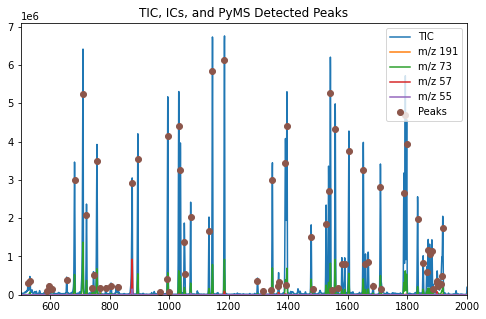

In [6]:
%matplotlib inline
# Change to `notebook` for an interactive view

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Plot the ICs
plot_ic(ax, tic, label="TIC")
plot_ic(ax, ic191, label="m/z 191")
plot_ic(ax, ic73, label="m/z 73")
plot_ic(ax, ic57, label="m/z 57")
plot_ic(ax, ic55, label="m/z 55")

# Plot the peaks
plot_peaks(ax, new_peak_list)

# Set the title
ax.set_title('TIC, ICs, and PyMS Detected Peaks')

# Add the legend
plt.legend()

plt.show()

The function |plot_peaks()| adds the
PyMassSpec detected peaks to the figure.